In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

  # 이 셀 실행후, 런타임 다시시작
  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')     # 한글 폰트
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)           # 유니코드 "-" sign

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.datasets import reuters

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


In [ ]:
# global constants and hyper-parameters
MY_SAMPLE = 2947
NUM_CLASS = 46          # Classification class
MY_NUM_WORDS = 2000     # number of words in dictionary


MY_HIDDEN = 512         # 
MY_DROPOUT = 0.5        # Dropout rate : temporarily dropout given rate of cell's outputs to "0" : like Regularization

MY_EPOCH = 10
MY_BATCH = 64

In [ ]:
####################
# DATABASE SETTING #
####################
# there are 46 news categories in reuters DB
labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper',
          'housing','money-supply','coffee','sugar','trade','reserves', 
          'ship','cotton','carcass','crude','nat-gas','cpi','money-fx',
          'interest','gnp','meal-feed','alum','oilseed','gold','tin',
          'strategic-metal','livestock','retail','ipi','iron-steel',
          'rubber','heat','jobs','lei','bop','zinc','orange',
          'pet- chem','dlr','gas','silver','wpi','hog','lead']

In [ ]:
# print shape information
def show_shape():
  print('\n== DB SHAPE INFO ==')
  print('X_train shape = ', X_train.shape)
  print('X_test shape = ', X_test.shape)
  print('Y_train shape = ', Y_train.shape)
  print('Y_test shape = ', Y_test.shape) 
  print()

In [ ]:
# read the DB and print shape info
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = MY_NUM_WORDS, test_split = 0.3)

show_shape()


== DB SHAPE INFO ==
X_train shape =  (7859,)
X_test shape =  (3369,)
Y_train shape =  (7859,)
Y_test shape =  (3369,)



In [ ]:
print(X_train[0])
print(Y_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [ ]:
# statistics on how many articles per category in the train DB
# numpy unique is useful in this case
print('\n== TRAIN DATA CONTENT INFO ==')
unique, counts = np.unique(Y_train, return_counts = True)
for i in range(len(unique)):
  print(unique[i], labels[i], "=", counts[i])


== TRAIN DATA CONTENT INFO ==
0 cocoa = 50
1 grain = 378
2 veg-oil = 66
3 earn = 2769
4 acq = 1701
5 wheat = 14
6 copper = 39
7 housing = 15
8 money-supply = 126
9 coffee = 93
10 sugar = 114
11 trade = 337
12 reserves = 40
13 ship = 149
14 cotton = 18
15 carcass = 19
16 crude = 387
17 nat-gas = 33
18 cpi = 59
19 money-fx = 475
20 interest = 238
21 gnp = 91
22 meal-feed = 10
23 alum = 36
24 oilseed = 56
25 gold = 77
26 tin = 18
27 strategic-metal = 13
28 livestock = 43
29 retail = 19
30 ipi = 38
31 iron-steel = 34
32 rubber = 30
33 heat = 9
34 jobs = 43
35 lei = 10
36 bop = 46
37 zinc = 17
38 orange = 16
39 pet- chem = 20
40 dlr = 32
41 gas = 28
42 silver = 10
43 wpi = 19
44 hog = 10
45 lead = 14


In [ ]:
# import numpy as np

# my_array = [1, 1, 2, 2, 2, 3]
# unique, count = np.unique(my_array, return_counts = True)

# # print the result
# print(unique)
# print(count)

In [ ]:
unique, count = np.unique(Y_train, return_counts=True)
print(Y_train)    # 7859
print(unique)     # Category
print(count)      # records per category

[ 3  4  3 ...  4 16  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[  50  378   66 2769 1701   14   39   15  126   93  114  337   40  149
   18   19  387   33   59  475  238   91   10   36   56   77   18   13
   43   19   38   34   30    9   43   10   46   17   16   20   32   28
   10   19   10   14]


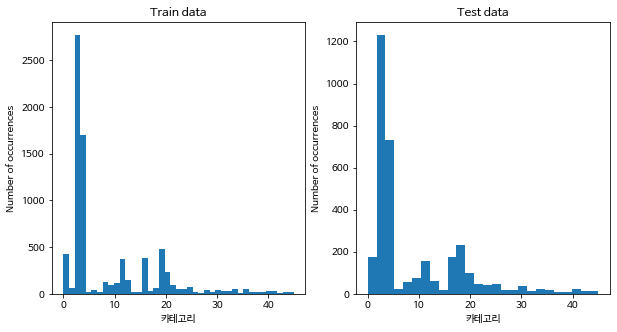

In [ ]:
# show the same statistics visually
import matplotlib.pyplot as plt
# plt.figure(1)
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(Y_train, bins='auto')
plt.xlabel("카테고리")
plt.ylabel("Number of occurrences")
plt.title("Train data")

plt.subplot(122)
plt.hist(Y_test, bins='auto')
plt.xlabel("카테고리")
plt.ylabel("Number of occurrences")
plt.title("Test data")
plt.show()

In [ ]:
# show a sample data in its raw format
print('\n== SAMPLE ARTICLE (RAW) ==')
print("article #", MY_SAMPLE)
print("category", Y_train[MY_SAMPLE], labels[Y_train[MY_SAMPLE]])
print("number of words", len(X_train[MY_SAMPLE]))
print(X_train[MY_SAMPLE])

# python dictionary: word -> index
# zero index is not used
word_to_id = reuters.get_word_index()
print('\n== DICTIONARY INFO ==')
print("There are", len(word_to_id) + 1, "words in the dictionary.")
print('The index of "the" is', word_to_id['the'])


== SAMPLE ARTICLE (RAW) ==
article # 2947
category 4 acq
number of words 61
[1, 2, 1229, 81, 8, 16, 515, 25, 270, 5, 4, 2, 1229, 111, 267, 7, 73, 2, 2, 7, 108, 13, 80, 1448, 28, 365, 12, 11, 15, 1986, 2, 69, 158, 18, 1296, 1275, 7, 2, 1627, 2, 2, 4, 393, 374, 1229, 323, 5, 2, 1229, 7, 2, 9, 25, 2, 473, 936, 4, 49, 8, 17, 12]

== DICTIONARY INFO ==
There are 30980 words in the dictionary.
The index of "the" is 1


In [ ]:
# python dictionary: index -> word
# this is the opposite to word_to_id dictionary
id_to_word = {}
for key, value in word_to_id.items():
  id_to_word[value] = key

In [ ]:
# function to translate the sample review
# we use python dictionary get() function
# it returns "???" if the ID is not found
# index is subtracted by 3 to handle first 3 special characters
#   index 0 is for padding (= filling empty space)
#   index 1 is for indicating the beginning of a review
#   index 2 is for dropped word (= out of bound)
# we use python list and join() function to concatenate the words

In [ ]:
def decoding():
  decoded = []
  for i in X_train[MY_SAMPLE]:
    word = id_to_word.get(i - 3, "???")
    decoded.append(word)

  print('\n== SAMPLE ARTICLE (DECODED) ==')
  print(" ".join(decoded))
  
decoding()
print("category", Y_train[MY_SAMPLE], labels[Y_train[MY_SAMPLE]])


== SAMPLE ARTICLE (DECODED) ==
??? ??? telephone corp said it completed its acquisition of the ??? telephone co based in new ??? ??? in exchange for stock valued at 26 3 mln dlrs enterprises ??? about 16 000 access lines in ??? county ??? ??? the third operating telephone subsidiary of ??? telephone in ??? and its ??? largest overall the company said reuter 3
category 4 acq


In [ ]:
# we will NOT do padding (as in movie review classification)
# instead we will do tokenization for the inputs
# we get a numpy array of size MY_NUM_WORDS for each input 
# the entries are integer counts 
# the resulting matrix is very big
from keras.preprocessing.text import Tokenizer
# for i in range(10):
#   print(len(X_train[i]))

Tok = Tokenizer(num_words = MY_NUM_WORDS)

print('before:', X_train[0])
print('number before:', len(X_train[0]))
X_train = Tok.sequences_to_matrix(X_train, mode = 'count')
print('after:', X_train[0])
print('number after:', len(X_train[0]))

X_test = Tok.sequences_to_matrix(X_test, mode = 'count')

before: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
number before: 87
after: [0. 1. 4. ... 0. 0. 0.]
number after: 2000


In [ ]:
# Tok = Tokenizer(num_words = MY_NUM_WORDS)
# X_train = Tok.sequences_to_matrix(X_train, mode = 'count')
# X_test = Tok.sequences_to_matrix(X_test, mode = 'count’)

print('\n== SAMPLE ARTICLE (TOKENIZED INPUT) ==')
sample = X_train[MY_SAMPLE]
print(*sample, sep = ' ')
print("Array size:", len(sample))
print("Sum of entries:", np.sum(sample))


== SAMPLE ARTICLE (TOKENIZED INPUT) ==
0.0 1.0 11.0 0.0 3.0 2.0 0.0 4.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [ ]:
# output reshaping using one-hot encoding
# from keras.utils import to_categorical
Y_train = to_categorical(Y_train, NUM_CLASS)
Y_test = to_categorical(Y_test, NUM_CLASS)

print('\n== SAMPLE ARTICLE (1-HOT ENCODING OUTPUT) ==')
sample = Y_train[MY_SAMPLE]
print(sample)
print("Array size:", len(sample))

show_shape()



== SAMPLE ARTICLE (1-HOT ENCODING OUTPUT) ==
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Array size: 46

== DB SHAPE INFO ==
X_train shape =  (7859, 2000)
X_test shape =  (3369, 2000)
Y_train shape =  (7859, 46)
Y_test shape =  (3369, 46)



In [ ]:
###############################
# MODEL BUILDING AND TRAINING #
###############################
# build a keras sequential model of our DNN
# softmax is needed for multi-class classification
model = Sequential()
model.add(Dense(units=MY_HIDDEN, input_shape = (MY_NUM_WORDS,)))
# model.add(Dense(MY_HIDDEN, input_shape = (MY_NUM_WORDS,)))  => have to give Tuple, eg (MY_NUM_WORDS,)
model.add(Activation('relu'))       # later comment this out or use others, 
model.add(Dropout(MY_DROPOUT))
model.add(Dense(NUM_CLASS))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1024512   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 46)                23598     
                                                                 
 activation_1 (Activation)   (None, 46)                0         
                                                                 
Total params: 1,048,110
Trainable params: 1,048,110
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# prediction using the model
# shape needs to change from (2000,) to (1, 2000)
def ask_question():
  sample = X_train[MY_SAMPLE]
  sample = sample.reshape(1, sample.shape[0])
  pred = model.predict(sample, verbose = 0)
  guess = np.argmax(pred)
  answer = np.argmax(Y_train[MY_SAMPLE])
  
  print('\n== SAMPLE QUESTION ==')
  print("My guess for sample article:", guess, labels[guess])
  print("The answer is:", answer, labels[answer]) 
  print()

ask_question()


== SAMPLE QUESTION ==
My guess for sample article: 1 grain
The answer is: 4 acq



In [ ]:
# model training and saving
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = MY_EPOCH, batch_size = MY_BATCH, verbose = 1)
model.save('chap2.h5')

Epoch 1/10
123/123 [==============================] - 5s 29ms/step - loss: 1.5951 - accuracy: 0.6814 - val_loss: 1.0906 - val_accuracy: 0.7709
Epoch 2/10
123/123 [==============================] - 3s 27ms/step - loss: 0.8248 - accuracy: 0.8166 - val_loss: 0.9339 - val_accuracy: 0.7964
Epoch 3/10
123/123 [==============================] - 2s 16ms/step - loss: 0.5725 - accuracy: 0.8693 - val_loss: 0.8737 - val_accuracy: 0.8172
Epoch 4/10
123/123 [==============================] - 2s 15ms/step - loss: 0.4284 - accuracy: 0.8997 - val_loss: 0.8846 - val_accuracy: 0.8151
Epoch 5/10
123/123 [==============================] - 2s 14ms/step - loss: 0.3455 - accuracy: 0.9164 - val_loss: 0.8869 - val_accuracy: 0.8172
Epoch 6/10
123/123 [==============================] - 2s 14ms/step - loss: 0.2802 - accuracy: 0.9328 - val_loss: 0.9425 - val_accuracy: 0.8035
Epoch 7/10
123/123 [==============================] - 2s 14ms/step - loss: 0.2472 - accuracy: 0.9369 - val_loss: 0.9640 - val_accuracy: 0.8071

In [ ]:
####################
# MODEL EVALUATION #
####################
# evaluate the model and calculate loss and accuracy
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred = model.predict(X_test)
print('Prediction for the first news: ', pred[0])
print(np.argmax(pred[0])) 
print('Answer: ', Y_test[0])
print(labels[np.argmax(Y_test[0])]) 


# ask_question()

106/106 [==============================] - 1s 6ms/step - loss: 1.0228 - accuracy: 0.8109
Test loss: 1.022796630859375
Test accuracy: 0.8109230995178223
Prediction for the first news:  [3.22900496e-06 1.41694851e-04 1.13677243e-05 9.97722089e-01
 1.53637506e-04 1.42586930e-06 2.01378793e-06 9.34992477e-06
 1.30355897e-04 1.86532270e-05 6.99617885e-05 1.09929169e-04
 1.29409556e-04 1.09581044e-04 5.39884695e-06 1.07686526e-06
 4.89228754e-04 6.94056507e-06 1.18522366e-05 3.15230456e-04
 2.58561951e-04 8.92716998e-05 4.48833407e-06 3.36628386e-06
 3.00458578e-05 7.71187570e-06 7.15408021e-07 2.67980369e-07
 6.73027353e-06 1.74658499e-06 3.38306963e-05 1.38831956e-06
 4.54773544e-05 1.93201254e-06 1.01185724e-05 3.21419435e-07
 1.82864424e-05 2.13436397e-06 1.88927006e-05 8.74327100e-07
 9.56531858e-06 4.34908907e-06 1.16170031e-06 4.18211903e-06
 2.18518622e-07 1.92102038e-06]
3
Answer:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0